# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

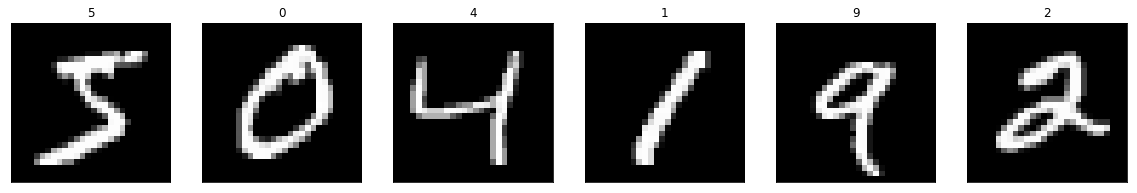

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import json

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

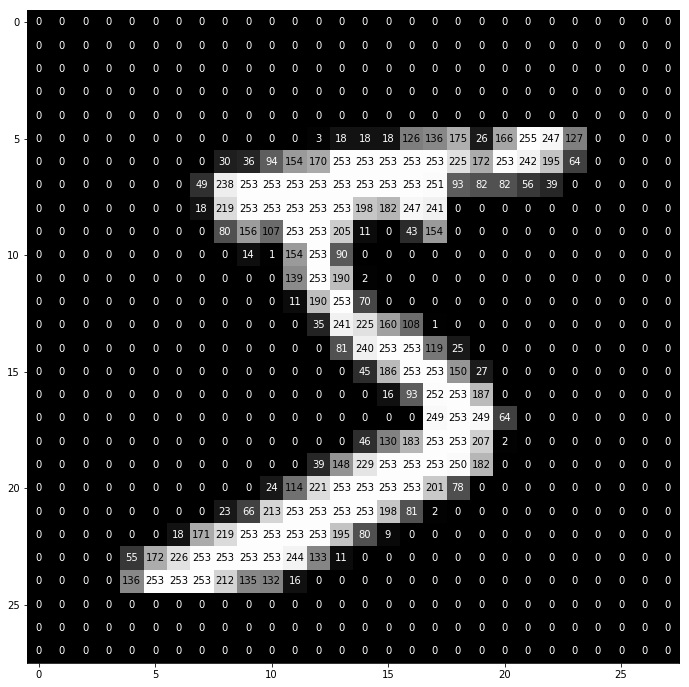

In [11]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [4]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
print(X_train.shape[1:])
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:])) # vectorize input matrix
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) # output should distinguish between 10 digits

# summarize the model
model.summary()

(28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_____________________________________________________________

### 7. Compile the Model

In [15]:
# compile the model
# multi-class classifier -> use categorical_crossentropy
# Labels = one-hot encoded: image of a number 3 label = 0001000000
# Model Prediction = one-hot-encoded: i.e. 000.10000.90 = 90% prob of 8 in image, 10% prob of 3 in image
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [16]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 9.9300%


### 9. Train the Model

In [17]:
from keras.callbacks import ModelCheckpoint   

# train the model

# Save best model weights after each epoch
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
# validation_split=0.2 -> 20% of data originally given as training data is removed from training set
# and used as validation set
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.12513, saving model to mnist.model.best.hdf5
2s - loss: 0.2728 - acc: 0.9146 - val_loss: 0.1251 - val_acc: 0.9633
Epoch 2/10
Epoch 00001: val_loss improved from 0.12513 to 0.09736, saving model to mnist.model.best.hdf5
2s - loss: 0.1134 - acc: 0.9651 - val_loss: 0.0974 - val_acc: 0.9730
Epoch 3/10
Epoch 00002: val_loss did not improve
2s - loss: 0.0784 - acc: 0.9767 - val_loss: 0.0978 - val_acc: 0.9740
Epoch 4/10
Epoch 00003: val_loss improved from 0.09736 to 0.08753, saving model to mnist.model.best.hdf5
2s - loss: 0.0610 - acc: 0.9817 - val_loss: 0.0875 - val_acc: 0.9773
Epoch 5/10
Epoch 00004: val_loss did not improve
2s - loss: 0.0524 - acc: 0.9838 - val_loss: 0.0934 - val_acc: 0.9779
Epoch 6/10
Epoch 00005: val_loss did not improve
2s - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0986 - val_acc: 0.9768
Epoch 7/10
Epoch 00006: val_loss did not improve
2s - loss: 0.0396 - acc: 0.98

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

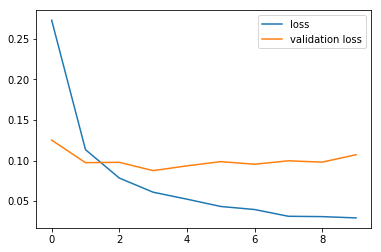

Test accuracy: 97.9000%
Test Loss:  0.0753978888816


In [20]:
# evaluate test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# evaluate train accuracy (reference to check for overfitting)
#train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

# print('Train accuracy: %.4f%%' % (train_accuracy*100))
# print('Train Loss: ', train_loss)

print('Test accuracy: %.4f%%' % (test_accuracy*100))
print('Test Loss: ', test_loss)


In [6]:
from keras.callbacks import ModelCheckpoint 
def make_model(num_nodes=512,num_layers=2,hidden_activation='relu',optimizer='rmsprop',dropout=0.2):
    """ Create a model with similar architecture to that given in step 6 further up the notebook.
    Default param values will create a model exactly the same as in step 6.
    """
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:])) # vectorize input matrix
    for _ in range(num_layers):
        model.add(Dense(num_nodes, activation=hidden_activation))
        if dropout:
            model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax')) # output should distinguish between 10 digits
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

def plot_model_loss(history,title=None):
    plt.figure()
    if title:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='validation')
    plt.legend(loc='best')
    
# m = make_model()
# m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Mini Project - Comparing Model Configurations
Lesson 6: Convolutional Neural Networks part 8

* Increase (or decrease) the number of nodes in each of the hidden layers.  Do you notice evidence of overfitting (or underfitting)?
* Increase (or decrease) the number of hidden layers.  Do you notice evidence of overfitting (or underfitting)?
* Remove the dropout layers in the network.  Do you notice evidence of overfitting?
* Remove the ReLU activation functions.  Does the test accuracy decrease?
* Remove the image pre-processing step with dividing every pixel by 255.  Does the accuracy decrease?
* Try a different optimizer, such as stochastic gradient descent.
* Increase (or decrease) the batch size.

The following cell contains all imports and functions needed for this section (no need to go back through the notebook and run certain cells).

In [8]:
# RUN THIS CELL BEFORE RUNNING ANY FURTHER CODE CELLS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import json
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

def pre_process(train, test, rescale=True):
    X_train, y_train = train 
    X_test, y_test = test
    if rescale:
        # rescale [0,255] --> [0,1]
        X_train = X_train.astype('float32')/255
        X_test = X_test.astype('float32')/255 
    # one-hot encode the labels
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    return (X_train, y_train), (X_test, y_test)

def init_data(rescale=True):    
    # use Keras to import pre-shuffled MNIST database
    train, test = mnist.load_data()
    return pre_process(train,test,rescale=rescale)

(x_train, y_train), (x_test, y_test) = init_data(rescale=True)

def make_model(num_nodes=512,num_layers=2,hidden_activation='relu',optimizer='rmsprop',dropout=0.2):
    """ Create a model with similar architecture to that given in step 6 further up the notebook.
    Default param values will create a model exactly the same as in step 6.
    """
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:])) # vectorize input matrix
    for _ in range(num_layers):
        model.add(Dense(num_nodes, activation=hidden_activation))
        if dropout:
            model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax')) # output should distinguish between 10 digits
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

def plot_model_loss(history,title=None):
    plt.figure()
    if title:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='validation')
    plt.legend(loc='best')

### Increasing/Decreasing Nodes in Hidden Layers
Explore relationship between number of nodes in hidden layers and presence of overfitting/underfitting in the resulting models.

In [41]:
# Had to remove Dropout layers for comparing testing/validation loss
# see https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss
def test_increasing_nodes(min_nodes, max_nodes,factor=2):
    results = []
    num_nodes=min_nodes
    while num_nodes <=max_nodes:
        m = make_model(num_nodes=num_nodes, dropout=False)
        # Save best model weights after each epoch
        checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                                       verbose=0, save_best_only=True)
        hist = m.fit(X_train, y_train, batch_size=128, epochs=10,
                  validation_split=0.2, callbacks=[checkpointer],
                  verbose=0, shuffle=True)
        m.load_weights('mnist.model.best.hdf5')
        score = m.evaluate(X_test, y_test, verbose=0)
        results.append({'num_nodes':num_nodes,'hist':hist.history,'score':score})
        num_nodes*=factor
    return results

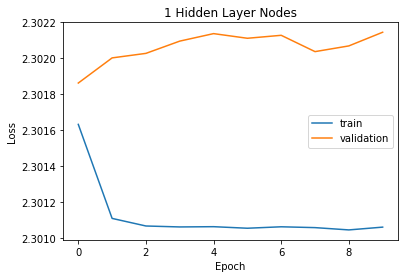

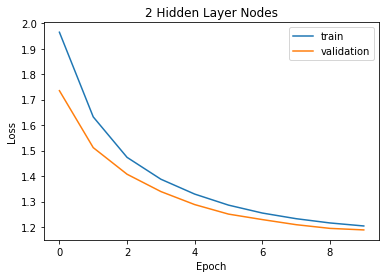

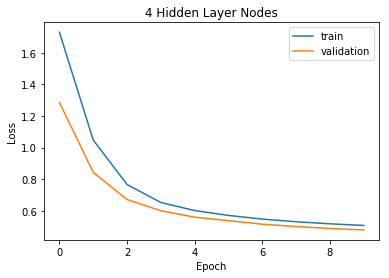

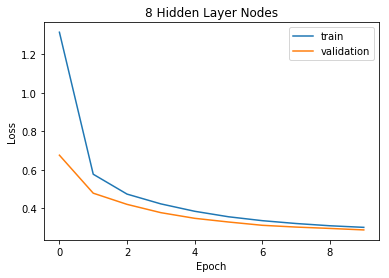

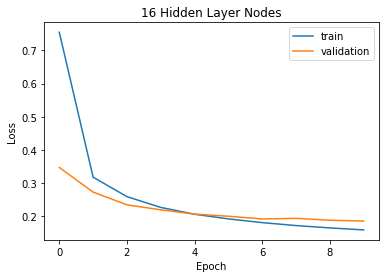

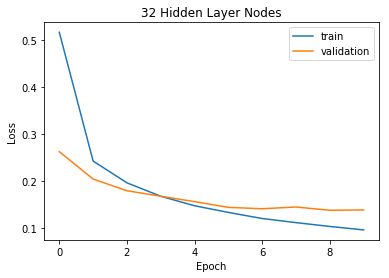

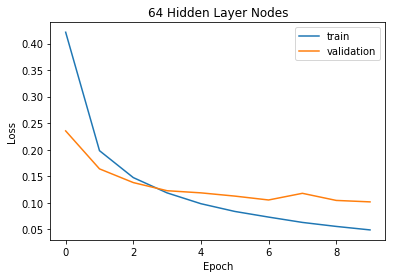

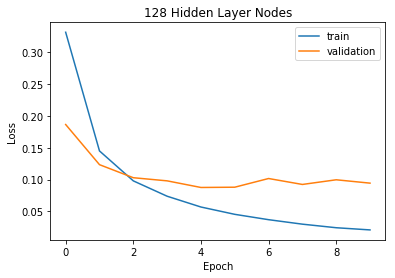

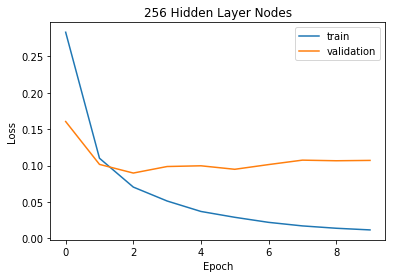

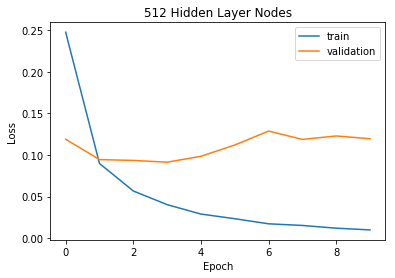

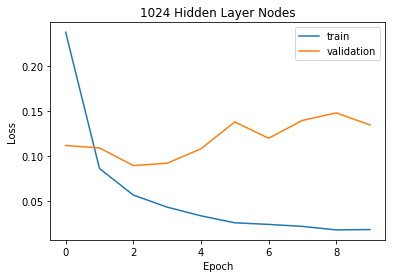

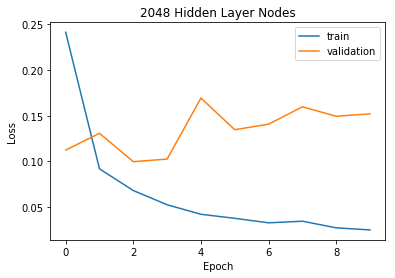

In [42]:
# Train and test models WARNING: TAKES A LONG TIME->ONLY RUN ON GPU
# model_data = test_increasing_nodes(1,2048)
# # Cache data for re-use without re-training
# with open('increase_nodes.json', 'w') as f:
#     json.dump(model_data, f)

# Load cached data instead
with open('increase_nodes.json') as f:
    model_data = json.load(f)
    
for data in model_data:
    title = '{} Hidden Layer Nodes'.format(data['num_nodes'])
    plot_model_loss(data['hist'],title=title)
# model with best score
# print(max(md, key=lambda x:x['score'][1]))print(max(md, key=lambda x:x['score'][1]))

#### Evaluation
**Up to a certain point** - as the number of nodes in the hidden layers increases, the model performance improves - moving from *underfitting* towards a well performing model. Past this point, the model performance **decreases** moving from well performing to *overfitting*.

With 1 node, the model is likely **under-provisioned** - it has insufficient capacity for learning. 

The model improves up to 8 nodes, at which point it stops *underfitting* and produces a well fitting model. This is characterised by the train and validation loss decreasing and stabilising around the same point.

Further increases in the number of nodes produces **overfitting** models - this is shown by the train and validation loss decreasing to a point at which the validation loss begins increasing again and the train loss continues decreasing.

### Increasing/Decreasing Number of Hidden Layers

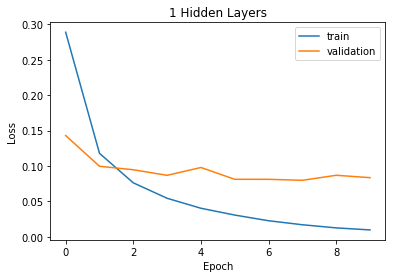

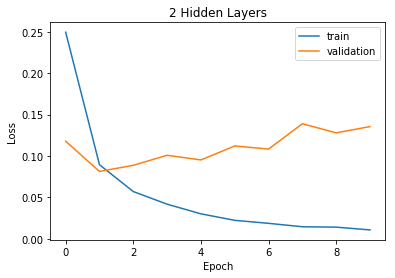

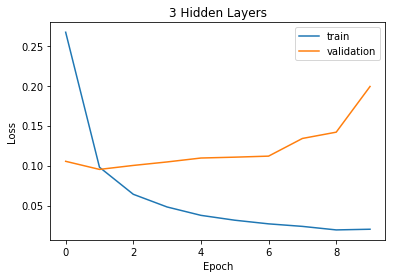

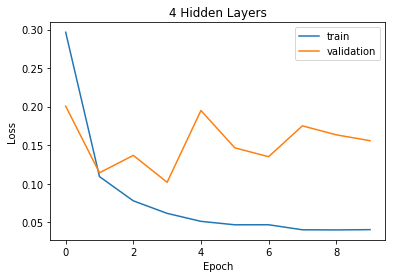

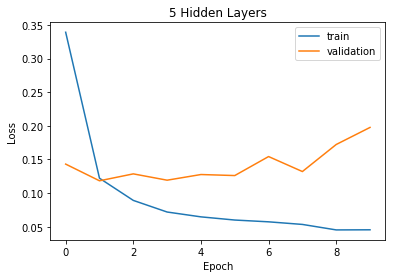

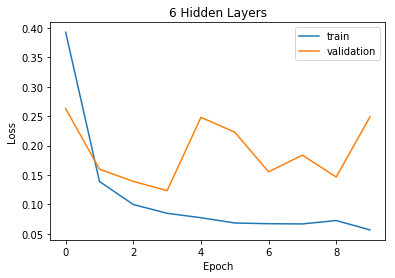

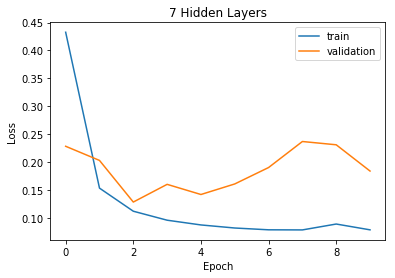

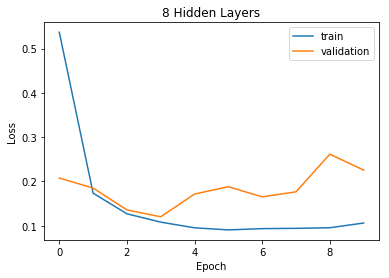

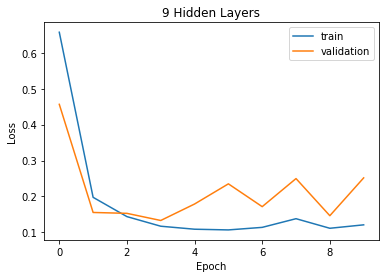

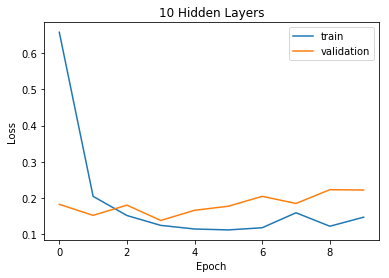

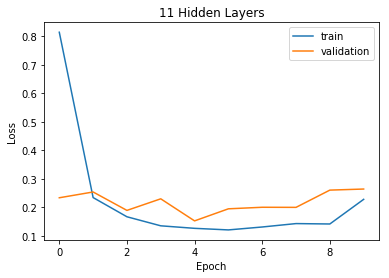

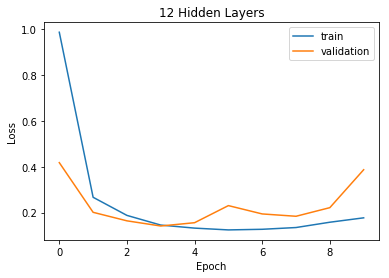

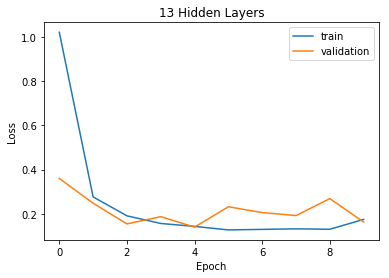

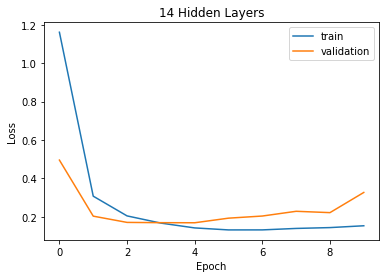

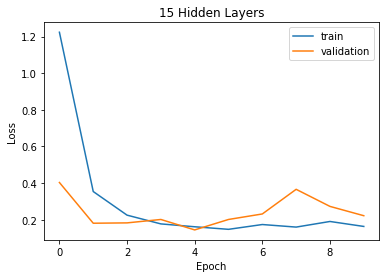

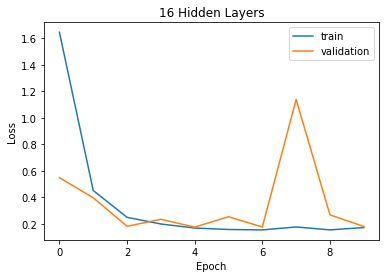

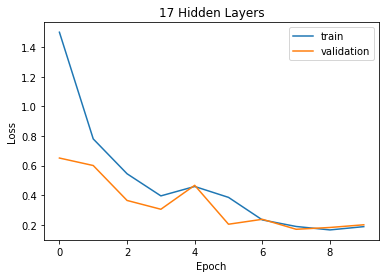

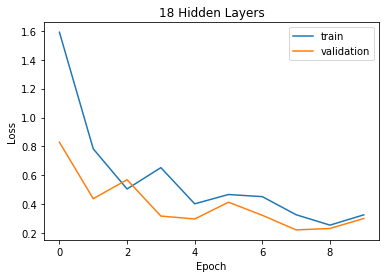

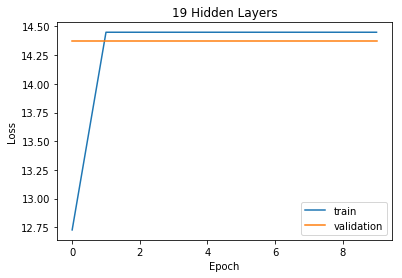

In [43]:
def test_increasing_layers(min_layers, max_layers,step=1,num_nodes=512):  # use same num_nodes as in Example given in starter code (step 6)
    results = []
    if min_layers==0:
        raise ValueError('Must have at least 1 layer')
    for num_layers in range(min_layers,max_layers,step):
        m = make_model(num_layers=num_layers, dropout=False)
        # Save best model weights after each epoch
        checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                                       verbose=0, save_best_only=True)
        hist = m.fit(X_train, y_train, batch_size=128, epochs=10,
                  validation_split=0.2, callbacks=[checkpointer],
                  verbose=0, shuffle=True)
        m.load_weights('mnist.model.best.hdf5')
        score = m.evaluate(X_test, y_test, verbose=0)
        results.append({'num_layers':num_layers,'hist':hist.history,'score':score})
    return results

# Train and test models WARNING: TAKES A LONG TIME->ONLY RUN ON GPU
#model_data = test_increasing_layers(1,20)
# Cache data for re-use without re-training
#with open('increase_layers.json', 'w') as f:
#    json.dump(model_data, f)

# Load cached data instead
with open('increase_layers.json') as f:
    model_data = json.load(f)
    
for data in model_data:
    title = '{} Hidden Layers'.format(data['num_layers'])
    plot_model_loss(data['hist'],title=title)

#### Evaluation
Models with **greater than 1** hidden layer have increasingly poor performance. The models overfit the data more and more severely, with low training loss and high validation loss. Furthermore, with greater than 10 hidden layers there is little improvement in validation loss at all. 19 hidden layers produced very odd results - training loss became worse and plataued at a high value of approximately 14.5. The validation loss simple didn't change at all!

### Removing Dropout

Test accuracy: 98.0300%
Test Loss:  0.0955820247606
Test accuracy: 98.1900%
Test Loss:  0.0987316887017


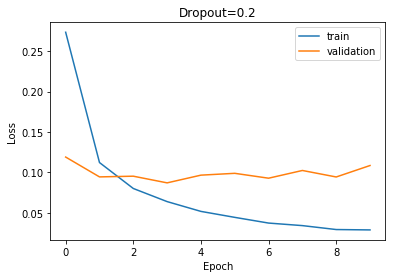

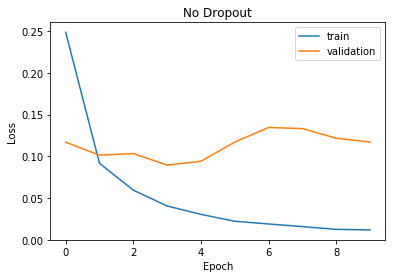

In [52]:
def train_and_test(model, print_results=True):
    checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                                   verbose=0, save_best_only=True)
    hist = m.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)
    score = model.evaluate(X_test, y_test, verbose=0)

    return score, hist

def print_score(score):
    print('Test accuracy: %.4f%%' % (score[1]*100))
    print('Test Loss: ', score[0]) 
    
# Compare model from step 6, with and without dropout
models = [(make_model(),'Dropout=0.2'), (make_model(dropout=False), 'No Dropout')]
model_data = []
for m, title in models:
    score, hist = train_and_test(m)
    model_data.append({'title':title,'score':score,'hist':hist.history})
        
# Cache data for re-use without re-training 
# with open('remove_dropout.json','w') as f:
#     json.dump(model_data, f)
    
# Load cached data instead
with open('remove_dropout.json') as f:
    model_data = json.load(f)    
    
for data in model_data:
    plot_model_loss(data['hist'],title=data['title'])
    print_score(data['score'])


#### Evaluation
Removing dropout increased overfitting in the model. Without dropout, interdependent learning amongst neurons in the network is more likely to occur. This will lead to overfitting as features that are prominant in the training set become dominant. As these features will be less prominant in testing/unseen data, the model is overfit.

### Removing Relu

Test accuracy: 96.6800%
Test Loss:  0.109478590611


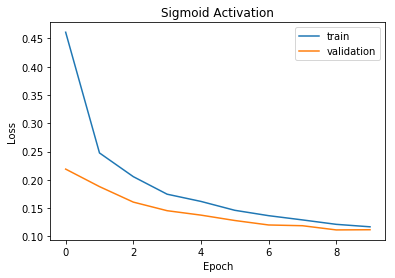

In [59]:
# m = make_model(hidden_activation='sigmoid')
# score, hist = train_and_test(m)
# hist = hist.history
# # Cache data for re-use without re-training 
# with open('remove_relu.json','w') as f:
#     json.dump({'hist':hist,'score':score}, f)
    
# Load cached data instead
with open('remove_relu.json') as f:
    model_data = json.load(f)
hist = model_data['hist']
score = model_data['score']

plot_model_loss(hist,title='Sigmoid Activation')
print_score(score)


    

#### Evaluation
The above graph can be compared with the 'Dropout=0.2' graph from the Removing Dropout tests above (the models and training are identical other than the actiavtion function).

Using a *sigmoid* activation function instead of *ReLU* produces a poorer performing model. This may be caused by the **vanishing gradient** problem in which the gradient of the error function becomes very small during training. This leads to the weights changing in very small amounts - or not at all. The ReLU activation function aims to prevent this by always having a derivative of 1 when it's input is positive. This leads to the partial derivatives that make up the gradient of the error function being larger and therefore the gradient of the error function being larger.

### Remove Image Pre-Processing Step

Test accuracy: 47.7000%
Test Loss:  8.42758470383


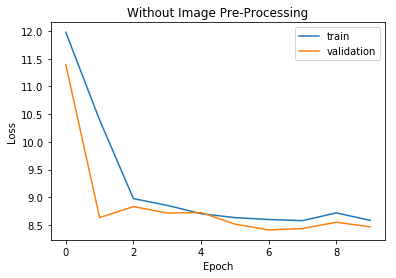

In [61]:
# re-load MIST data from Keras
(X_train, y_train), (X_test, y_test) = init_data(rescale=False)

m = make_model()
score, hist = train_and_test(m)
hist = hist.history

# Cache data for re-use without re-training 
with open('remove_preprocess.json','w') as f:
    json.dump({'hist':hist,'score':score}, f)
    
# Load cached data instead
# with open('remove_relu.json') as f:
#     model_data = json.load(f)
# hist = model_data['hist']
# score = model_data['score']

plot_model_loss(hist,title='Without Image Pre-Processing')
print_score(score)

# Reload data with image pre-processing for use in later cells TODO: REMOVE GLOBALS
(X_train, y_train), (X_test, y_test) = init_data()

#### Evaluation
Previously, the image data had been pre-procesed by dividing each pixel by 255. This re-scales the values, moving from a range of 0-255 to a range of 0-1.

Without this, the model performance decreased *drastically*, moving from approximate test accuracy and loss of 97% and 0.075 respectively to 47.7% and 8.42.

The model is unable to effectively process values with a large range such as 0-255. With a typical learning rate, training would require many more epochs in order to reach convergence. Scaling the values to a smaller range allows training to converge 'quicker'.

### Different Optimizer - Stochastic Gradient Descent

Test accuracy: 93.4000%
Test Loss:  0.228800378317


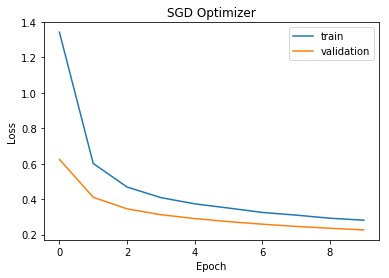

In [63]:
m = make_model(optimizer='sgd')
score, hist = train_and_test(m)
hist = hist.history
# Cache data for re-use without re-training 
with open('diff_optimizer.json','w') as f:
    json.dump({'hist':hist,'score':score}, f)
    
# Load cached data instead
# with open('remove_relu.json') as f:
#     model_data = json.load(f)
# hist = model_data['hist']
# score = model_data['score']
plot_model_loss(hist,title='SGD Optimizer')
print_score(score)   

#### Evaluation
Using the Stochastic Gradient Descent Optimizer instead of RMSprop produced a less accurate model.

### Increase/Decrease Batch Size

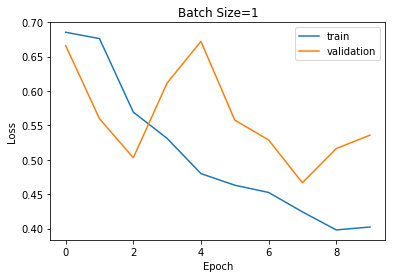

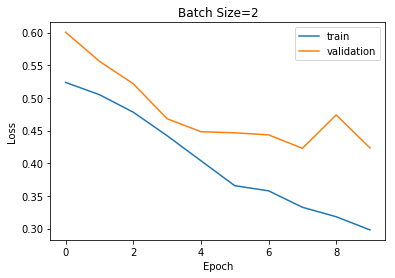

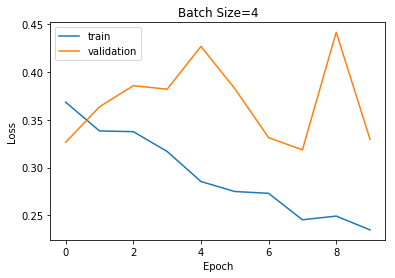

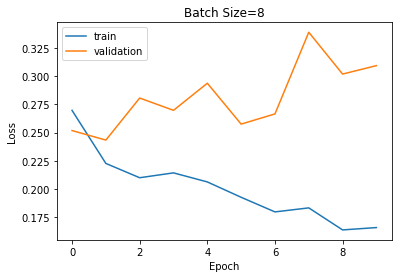

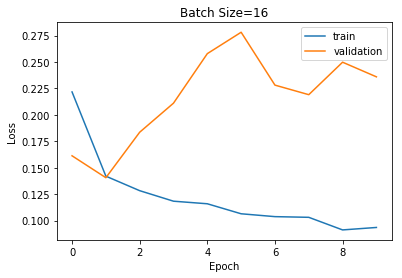

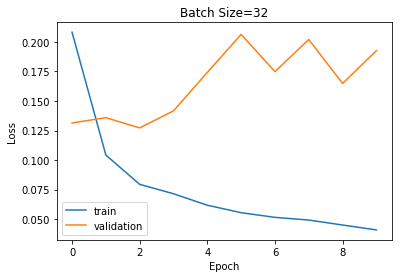

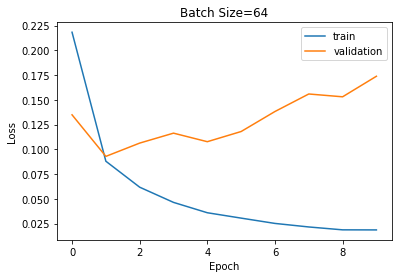

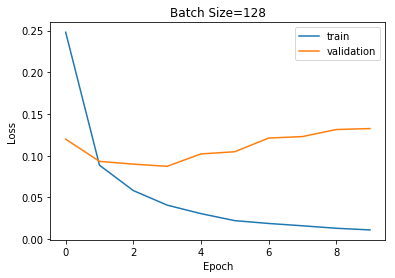

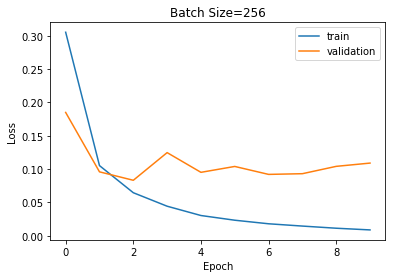

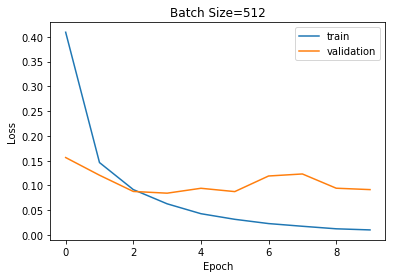

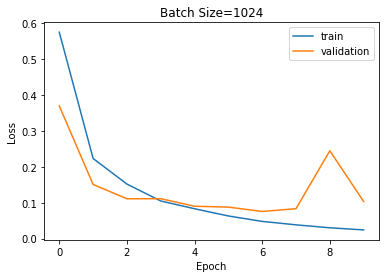

In [7]:
def test_increasing_batch_size(min_size, max_size,factor=2):
    results = []
    batch_size=min_size
    while batch_size <=max_size:
        m = make_model(dropout=False)
        # Save best model weights after each epoch
        checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                                       verbose=0, save_best_only=True)
        hist = m.fit(X_train, y_train, batch_size=batch_size, epochs=10,
                  validation_split=0.2, callbacks=[checkpointer],
                  verbose=0, shuffle=True)
        m.load_weights('mnist.model.best.hdf5')
        score = m.evaluate(X_test, y_test, verbose=0)
        results.append({'batch_size':batch_size,'hist':hist.history,'score':score})
        batch_size*=factor
    return results

# Train and test models WARNING: TAKES A LONG TIME->ONLY RUN ON GPU
# model_data = test_increasing_batch_size(1,1024)
# # Cache data for re-use without re-training
# with open('increase_batch.json', 'w') as f:
#     json.dump(model_data, f)

# Load cached data instead
with open('increase_layers.json') as f:
    model_data = json.load(f)
    
for data in model_data:
    title = 'Batch Size={}'.format(data['batch_size'])
    plot_model_loss(data['hist'],title=title)

#### Evaluation
Batch size had a large effect on model performance. It can be seen that increasing the batch size had a positive effect - up to a point. A larger batch size allows for reduced variance in the updates of weights during training. Furthermore, smaller batch sizes will require more epochs suring training to reach convergence as less of the data is 'seen' by the network at each step. As these tests had a fixed number of epochs, the smaller batch sizes had very poor performance.